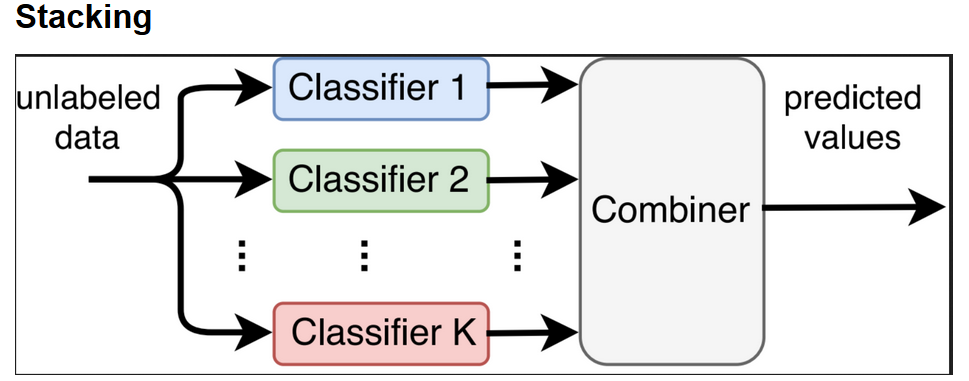

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Stacking Classification

In [2]:
df=pd.read_csv("../Data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Base models
base_models=[ ('knn',KNeighborsClassifier(n_neighbors=5)),
             ('svm',SVC(C=0.1,kernel='linear')),
             ('DT',DecisionTreeClassifier())
]
#Final Model
from sklearn.linear_model import LogisticRegression
final_model=LogisticRegression()
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is  0.8116883116883117
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



<AxesSubplot:>

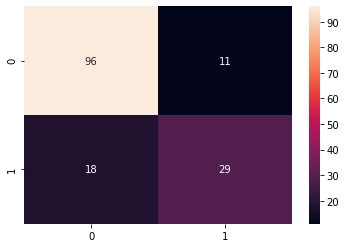

In [15]:
#Evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print("Accuracy is ",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

### Stacking Regressor

In [16]:
df=pd.read_csv("../Data/housing.csv")

In [17]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [18]:
x=df.drop(columns=["MEDV"])
y=df["MEDV"]

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import StackingRegressor
#base models
base_models=[
    ('ABR',AdaBoostRegressor(n_estimators=50)),
    ('GBR',GradientBoostingRegressor(n_estimators=50)),
    ('RFR',RandomForestRegressor(n_estimators=50))
]
#Final Model
final_model=LinearRegression()

#stacking Regressor
model=StackingRegressor(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Evaluation of Model
print("R2 Score " ,r2_score(ytest,ypred))
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE :",np.sqrt(mse))

R2 Score  0.819360143841203
MSE: 5129870246.350048
MAE: 54388.54972114759
RMSE : 71623.11251509564


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html">Click Here For Stacking Classifier Documentation</a>